In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn asa sns

In [6]:
#Read Data, 

def read_data(filename) :
    data = pd.read_csv(filename)
    print("Memory Usage : {} MB".format((data.memory_usage()/1024**2).sum()))
    return data

In [7]:
# fuction to bining numerical type

def binning_indicis(data, variable, num_bins=10) :
    bin_var = pd.qcut(x = data[variable], q = num_bins, duplicates='drop')
    print("Number Bins of {} : {}".format(variable ,bin_var.nunique()))
    return bin_var

In [8]:
# make woe table

def bin_woe(data, variable, target):
    table_woe = data.groupby(variable)[target].agg({'Incidence':np.mean, 'Size':np.size})
    cross_table=pd.crosstab(data[variable], data[target]).rename(columns={0:'Good', 1:'Bad'})
    
    total_bad = cross_table['Bad'].sum()
    total_good = cross_table['Good'].sum()
    
    cross_table['perc_bad'] = cross_table['Bad']/total_bad
    cross_table['perc_good'] = cross_table['Good']/total_good
    cross_table['woe_{}'.format(variable)] = np.log(cross_table['perc_good']/cross_table['perc_bad'])
    cross_table['IV'] = (cross_table['perc_good']-cross_table['perc_bad'])*cross_table['woe_{}'.format(variable)]
    
    IV_sum = cross_table['IV'].sum()
    
    table_woe = pd.concat([table_woe, cross_table], axis=1)
    
    return(table_woe, IV_sum)

In [9]:
# Check Outlier

def Outlier(data, variable, print_outlier=False) :
    mean = data[variable].mean()
    std = data[variable].std()
    #scale to the mean
    scale = (data[variable] - mean).abs()
    outlier_index = scale[scale>=3*std].index
    outlier_count = scale[scale>=3*std].count()
    if print_outlier :
        print('Jumlah Outlier variable {} : {}'.format(variable ,count))
    return outlier_count, outlier_index

In [10]:
#3 kind of plot

def hist_plot(data, variable,log_x=False, bins=10, no_outlier=False) :
    plt.figure(figsize=(9, 5))
    data[variable].plot(kind='hist', colormap='summer', grid=True, bins=bins)
    plt.title('Histogram of {}'.format(variable), fontsize=24)
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.show()
    if log_x :
        plt.figure(figsize=(9, 5))
        data[variable].plot(kind='hist', logx=log_x, colormap='autumn', grid=True, bins=bins)
        plt.title("Histogram of log {} ".format(variable), fontsize=24)
        plt.xlabel("Log {}".format(variable))
        plt.ylabel('Count')
        plt.show()
    if no_outlier :
        count, index = Outlier(data, variable)
        if count != 0 :
            plt.figure(figsize=(9, 5))
            no_outlier = data.drop(index)[variable]
            no_outlier.plot(kind='hist', colormap='Accent', grid=True, bins=bins)
            plt.title("Histogram of {} without Outlier".format(variable))
            plt.xlabel(variable)
            plt.ylabel('Count')
            plt.show()
            print('Jumlah Outlier variable {} : {}'.format(variable ,count))

In [5]:
train = read_data('creditcard.csv')

Memory Usage : 67.3601303100586 MB


In [11]:
train.shape

(284807, 31)

In [12]:
train.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [13]:
train.iloc[:, :15].head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670


In [14]:
train.iloc[:, 15:].head()

,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
train.iloc[:, 15:].describe()

,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [15]:
train.iloc[:, :15].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [18]:
print("Percent Missing Value")
(train.isnull().sum()/len(train)).sort_values(ascending=False).head(10)

Percent Missing Value


Class    0.0
V14      0.0
V1       0.0
V2       0.0
V3       0.0
V4       0.0
V5       0.0
V6       0.0
V7       0.0
V8       0.0
dtype: float64

In [19]:
print("Perc Non-Fraud and Fraud ")

train.Class.value_counts()/len(train)*100

Perc Non-Fraud and Fraud 


0    99.827251
1     0.172749
Name: Class, dtype: float64

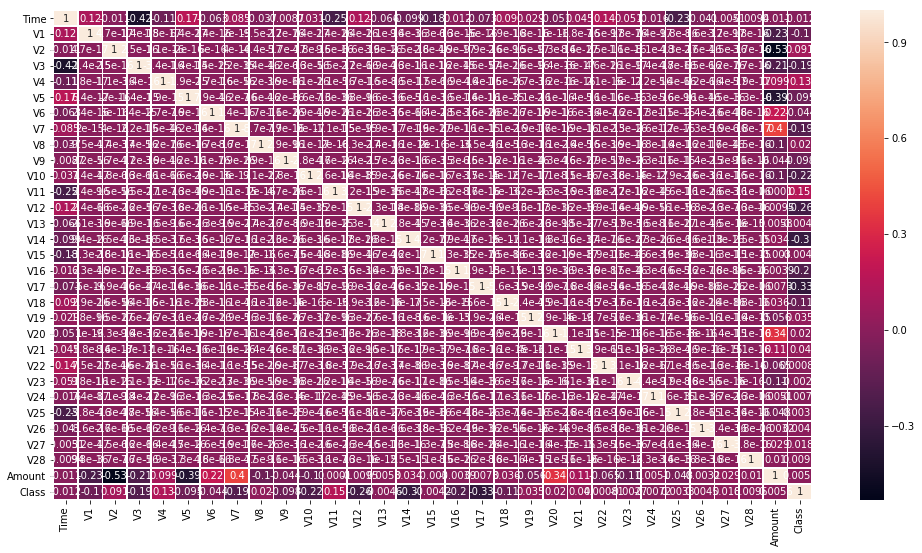

In [31]:
plt.figure(figsize=(17, 9))
sns.heatmap(train.corr(), annot=True, linewidth=0.5)
plt.show()

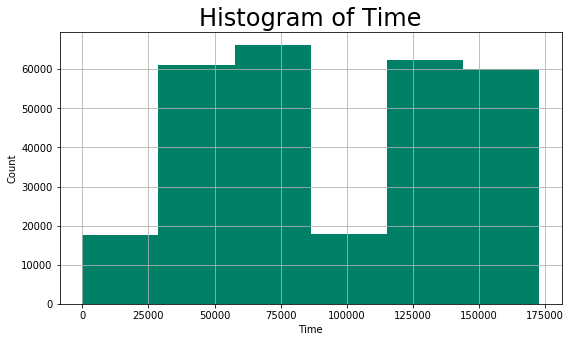

In [29]:
hist_plot(train, 'Time', bins=6)

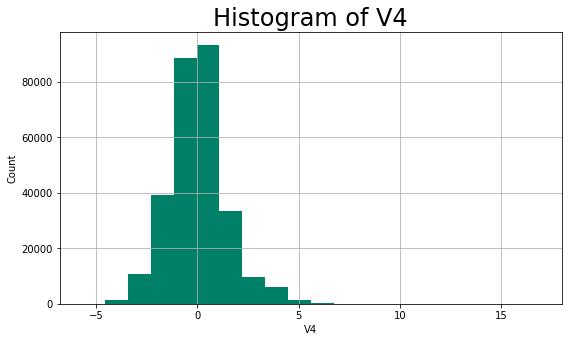

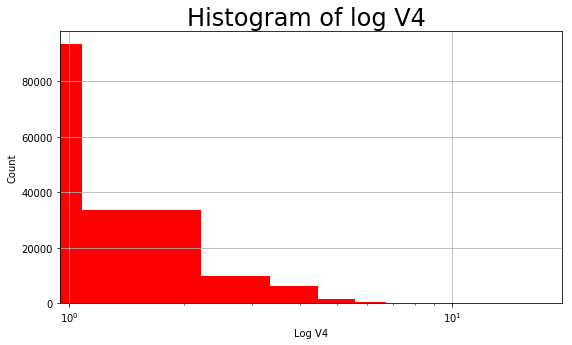

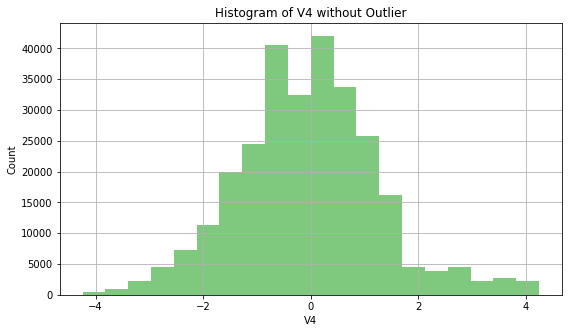

Jumlah Outlier variable V4 : 3094


In [145]:
hist_plot(train, 'V4', log_x=True, bins=20, no_outlier=True)

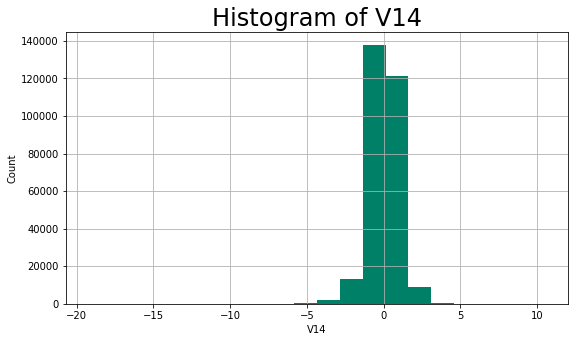

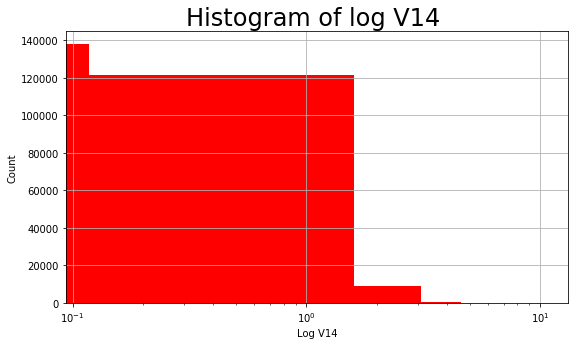

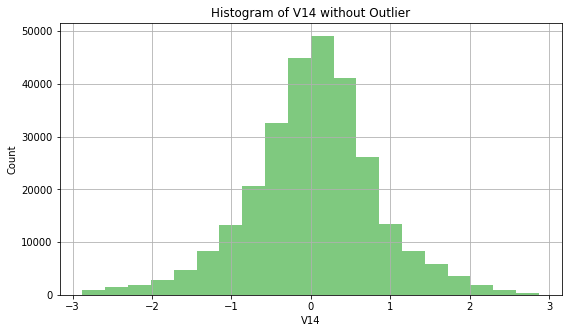

Jumlah Outlier variable V14 : 3380


In [146]:
hist_plot(train, 'V14', log_x=True, no_outlier=True, bins=20)

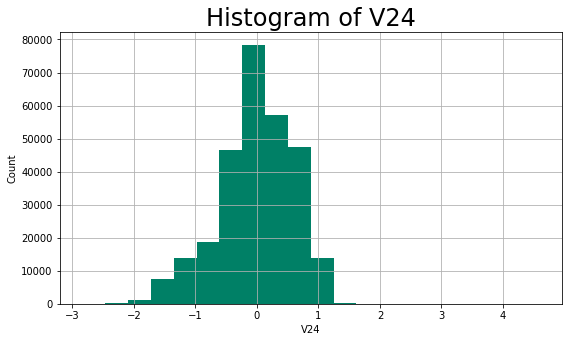

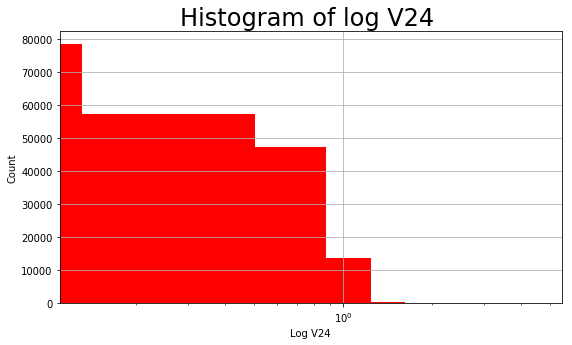

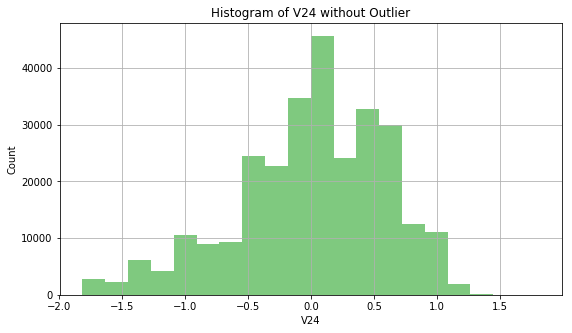

Jumlah Outlier variable V24 : 657


In [147]:
hist_plot(train, 'V24', log_x=True, no_outlier=True, bins=20)

In [20]:
train.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [22]:
# disini saya akan membuat jumlah bin yang berbeda pada V4, karena jika V4 jumlah bin nya lebih dari 6, maka adalah salah satu
# binnya mempunyai nilai woe infinite

bin_dict = {}
for col in train.drop(['Class', 'V4'], axis=1).columns:
    bin_dict[col]= binning_indicis(train, col, 10)

bin_dict['V4'] = binning_indicis(train, 'V4', 6)

Number Bins of Time : 10
Number Bins of V1 : 10
Number Bins of V2 : 10
Number Bins of V3 : 10
Number Bins of V5 : 10
Number Bins of V6 : 10
Number Bins of V7 : 10
Number Bins of V8 : 10
Number Bins of V9 : 10
Number Bins of V10 : 10
Number Bins of V11 : 10
Number Bins of V12 : 10
Number Bins of V13 : 10
Number Bins of V14 : 10
Number Bins of V15 : 10
Number Bins of V16 : 10
Number Bins of V17 : 10
Number Bins of V18 : 10
Number Bins of V19 : 10
Number Bins of V20 : 10
Number Bins of V21 : 10
Number Bins of V22 : 10
Number Bins of V23 : 10
Number Bins of V24 : 10
Number Bins of V25 : 10
Number Bins of V26 : 10
Number Bins of V27 : 10
Number Bins of V28 : 10
Number Bins of Amount : 10
Number Bins of V4 : 6


In [23]:
train2 = train.Class
for col in bin_dict.keys() :
    train2 = pd.concat([train2, bin_dict[col]], axis=1)

In [24]:
woe_dict = {}
IV_dict = {}
for col in bin_dict.keys() :
    table_woe, IV = bin_woe(train2, col,  'Class')
    woe_dict[col] = table_woe
    IV_dict[col] = IV

C:\Users\Data Scientist\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


In [25]:
woe_dict['V4']

,Incidence,Size,Good,Bad,perc_bad,perc_good,woe_V4,IV
V4,,,,,,,,
"(-5.684, -1.258]",0.000021,47468,47467,1,0.002033,0.166952,4.408431,0.727037
"(-1.258, -0.602]",0.000042,47468,47466,2,0.004065,0.166949,3.715262,0.605155
"(-0.602, -0.0198]",0.000211,47468,47458,10,0.020325,0.166920,2.105656,0.308679
"(-0.0198, 0.462]",0.000337,47467,47451,16,0.032520,0.166896,1.635505,0.219772
"(0.462, 1.139]",0.000463,47468,47446,22,0.044715,0.166878,1.316946,0.160882
"(1.139, 16.875]",0.009290,47468,47027,441,0.896341,0.165405,-1.689927,1.235230


In [26]:
IV_series = pd.Series(IV_dict, index=IV_dict.keys())

In [27]:
IV_series.head()

Time    0.244213
V1      1.526699
V2      2.195314
V3      2.741560
V5      1.057931
dtype: float64

In [32]:
IV_series[IV_series>=0.1].sort_values(ascending=False).head()

V14    3.780017
V4     3.256755
V12    3.210878
V17    3.052115
V10    2.967957
dtype: float64

In [30]:
def graph_woe(data, variable) :
    data[variable]['Incidence'].plot(secondary_y=True, color='black')
    data[variable]['Size'].plot(kind='bar', color='lightgrey', rot=45, grid=True, figsize=(10, 7))
    
    index = data[variable].index
    plt.xticks(np.arange(len(index)), index, rotation=45)
    plt.ylabel('Incidence',  fontsize=20)
    plt.xlabel(variable, fontsize=20)
    plt.title(variable, fontsize=25)
    plt.show()

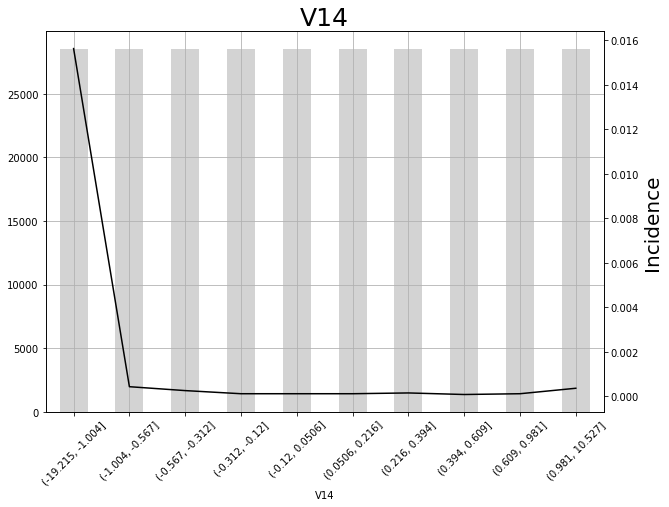

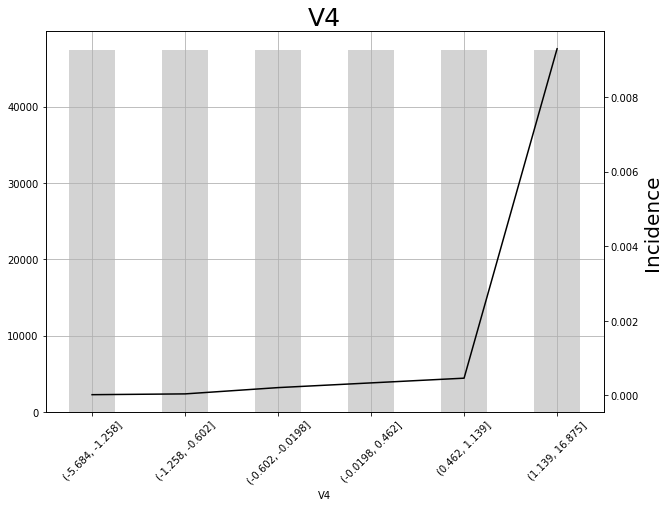

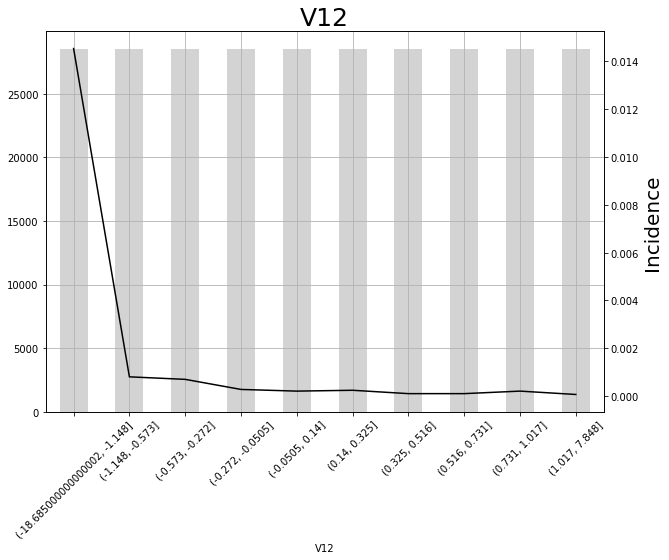

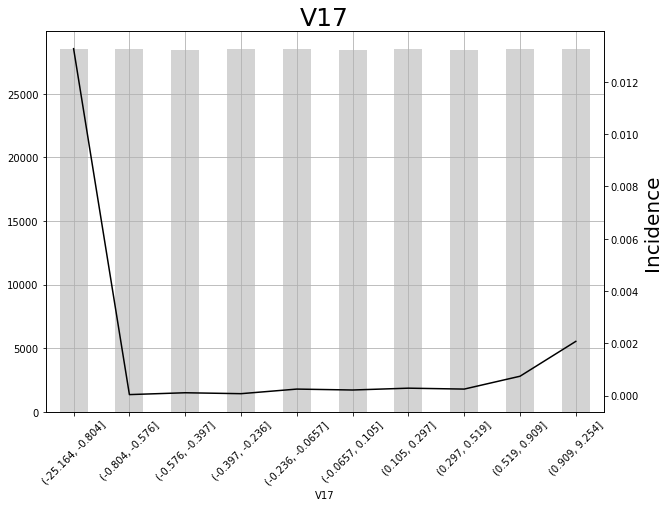

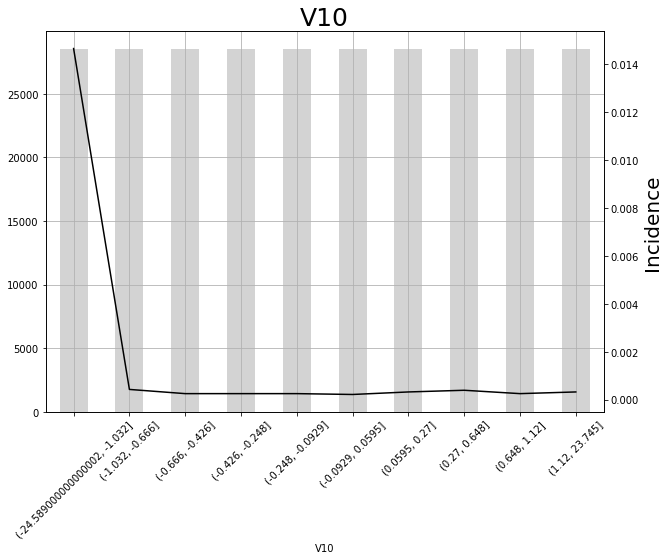

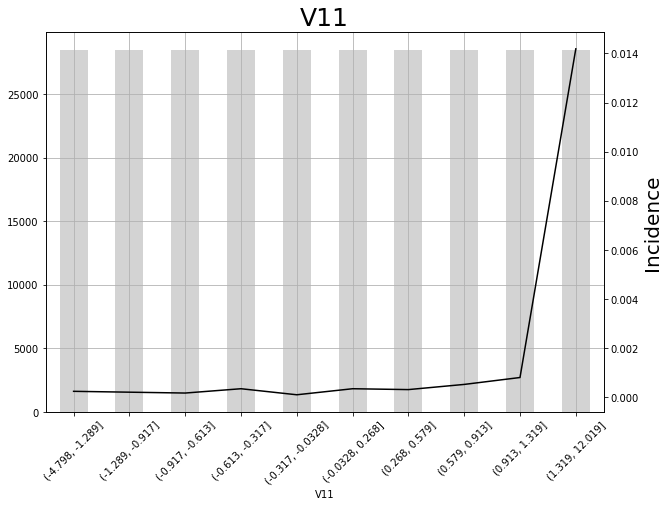

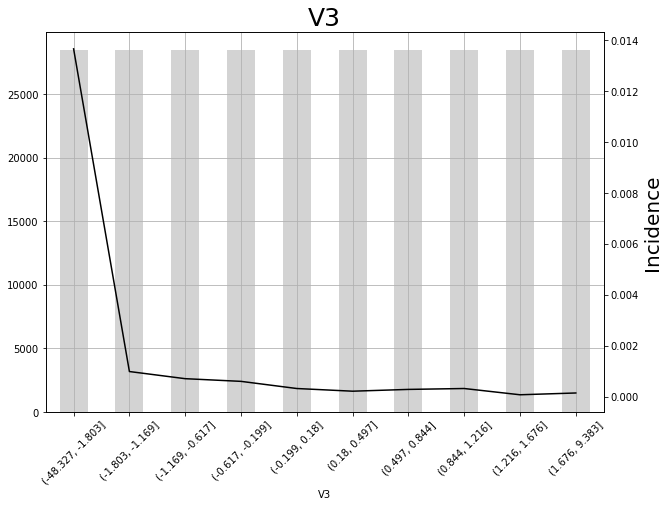

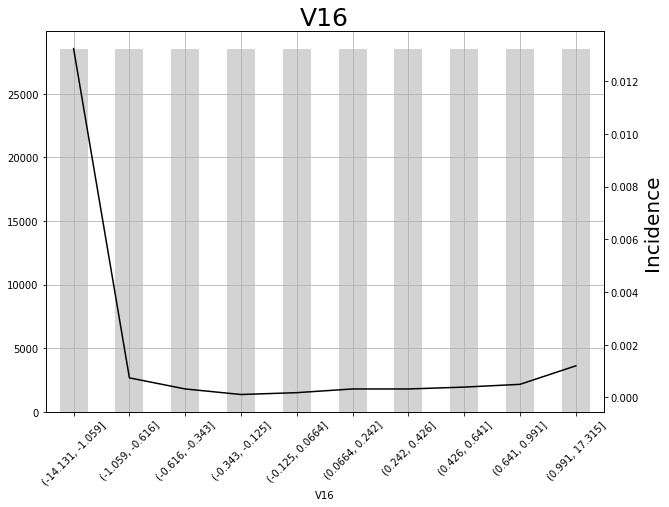

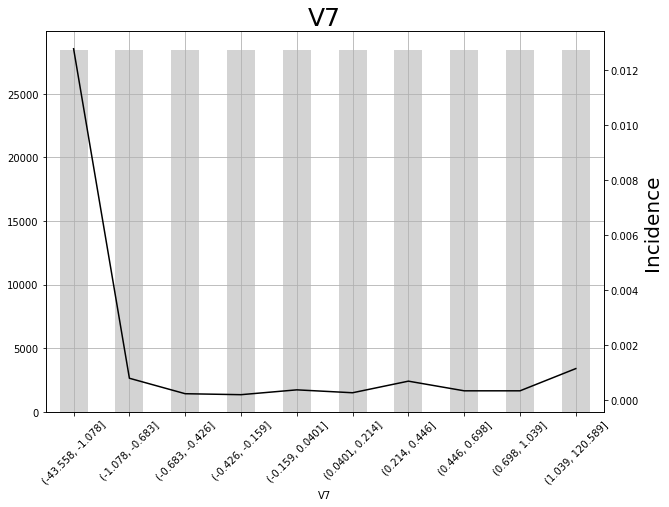

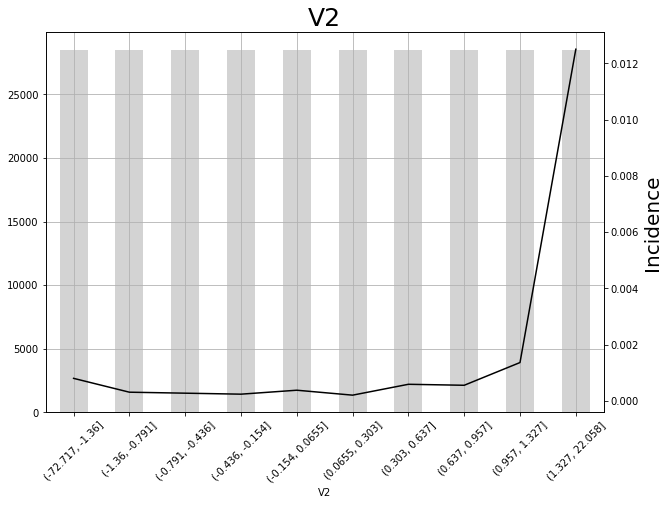

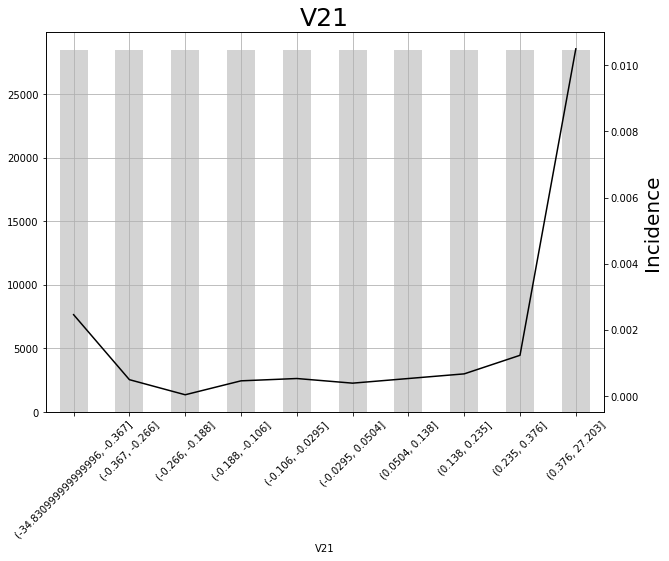

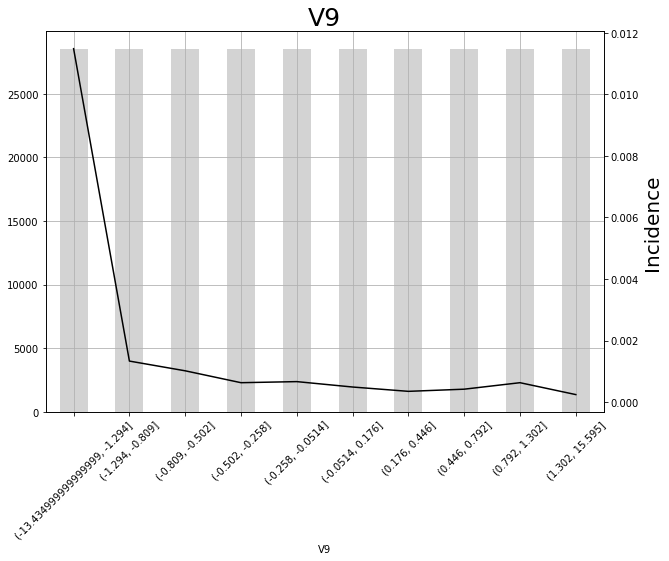

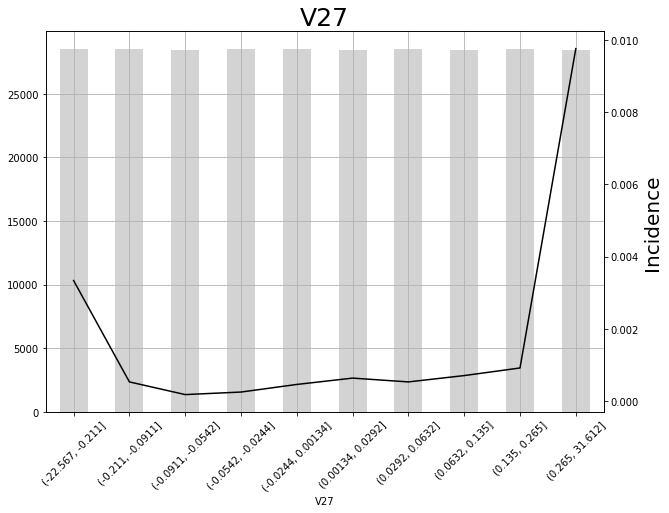

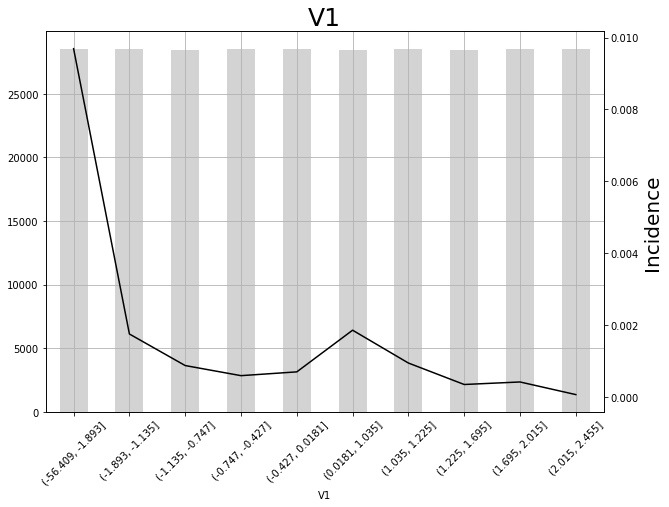

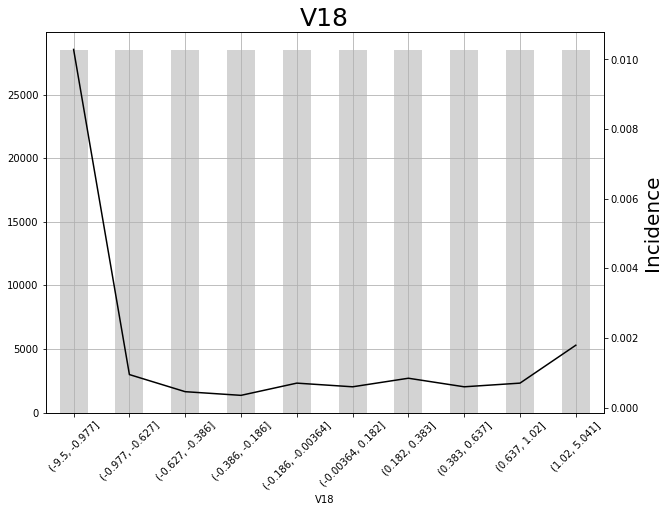

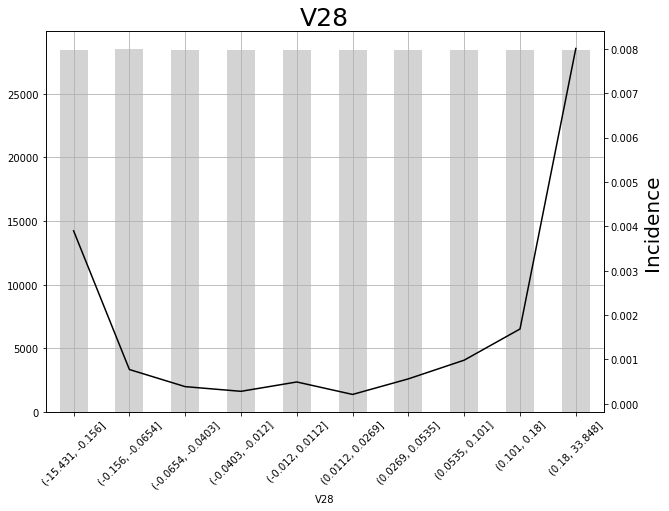

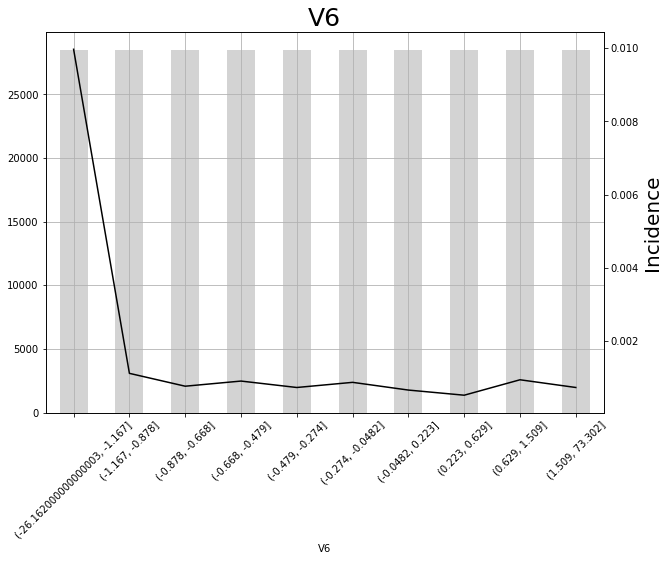

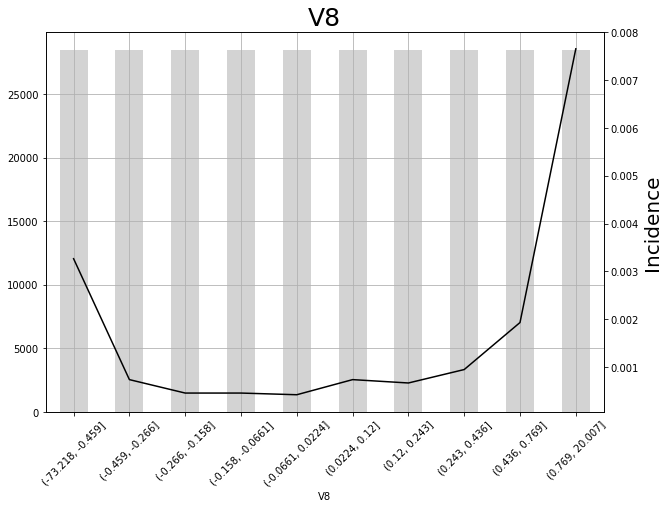

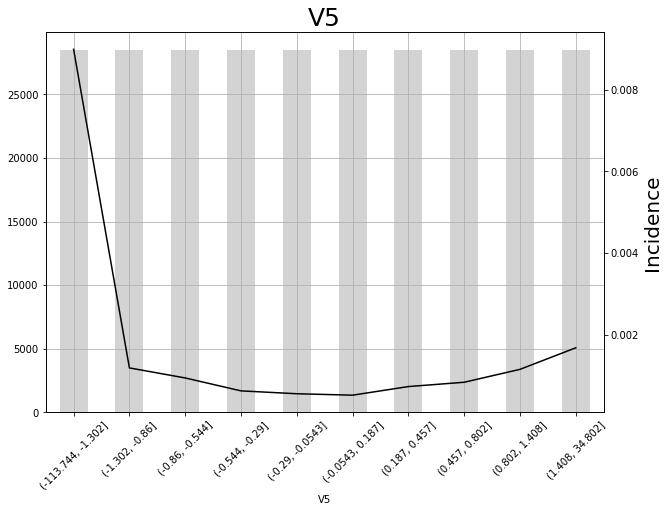

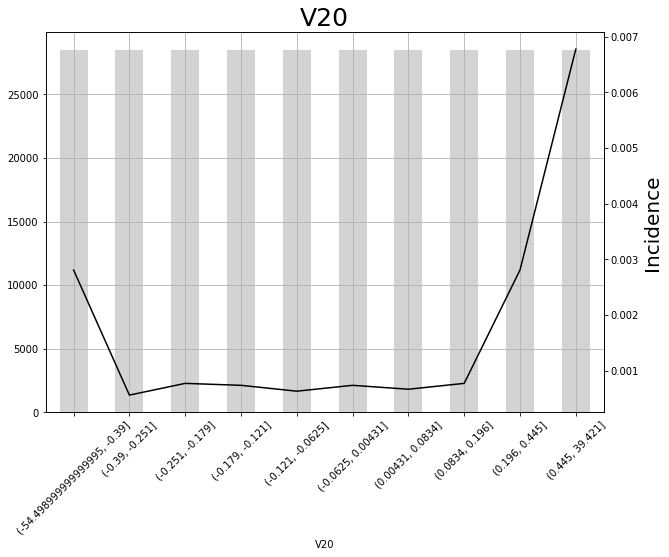

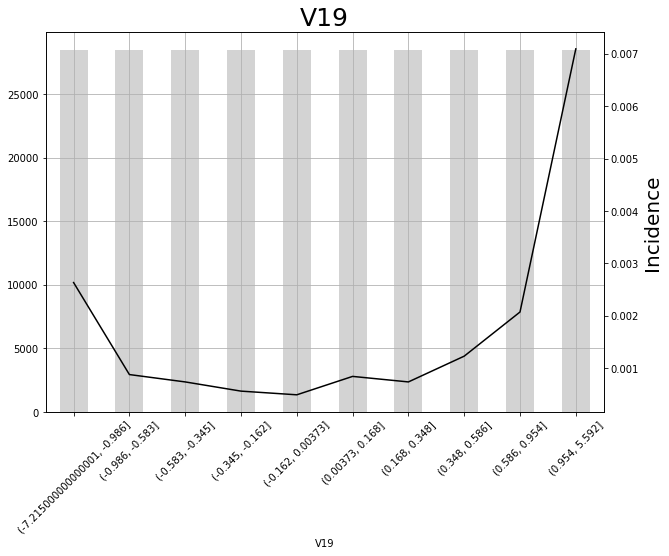

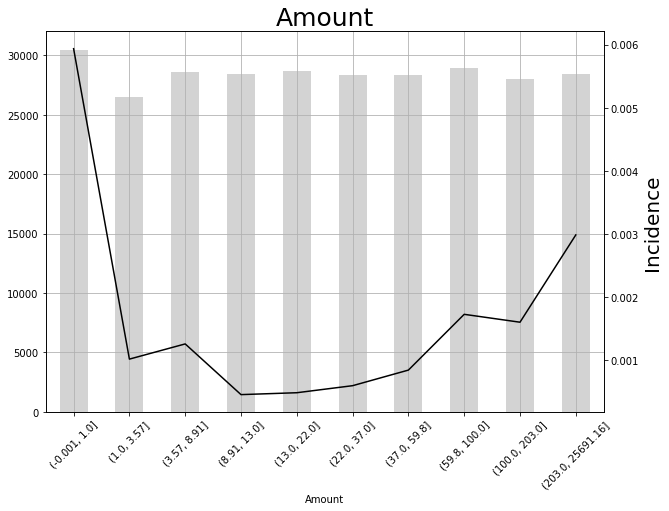

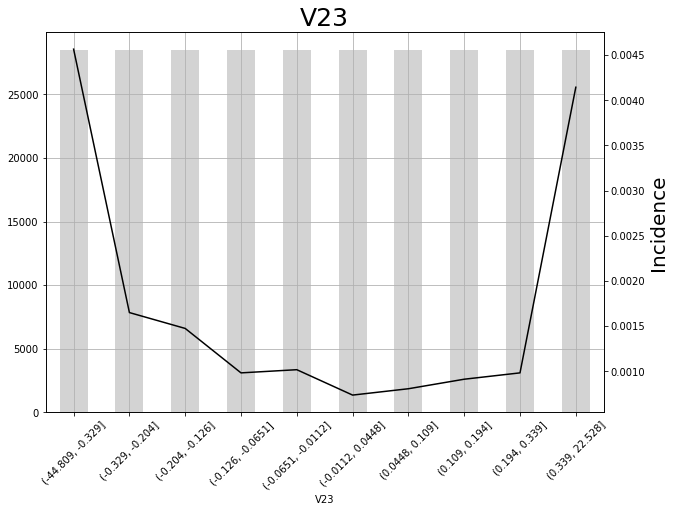

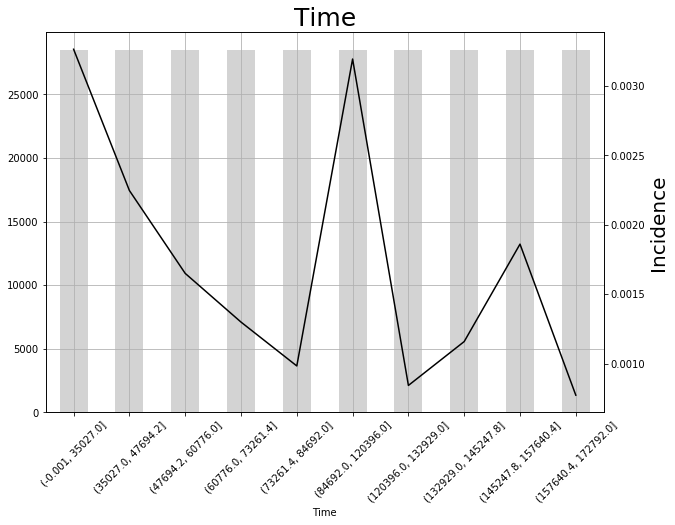

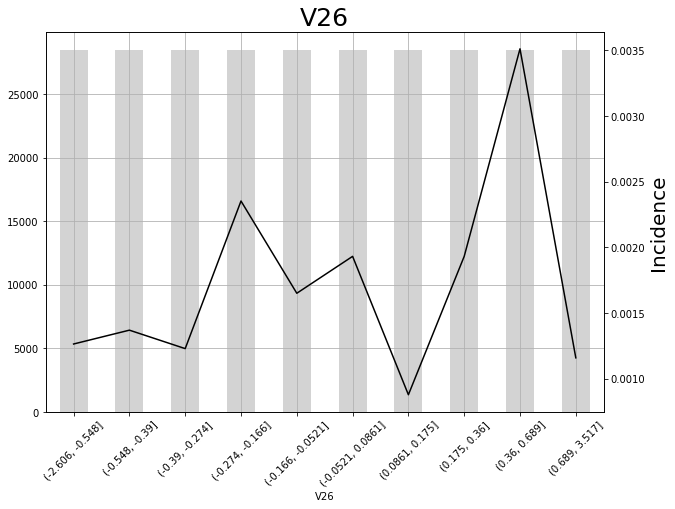

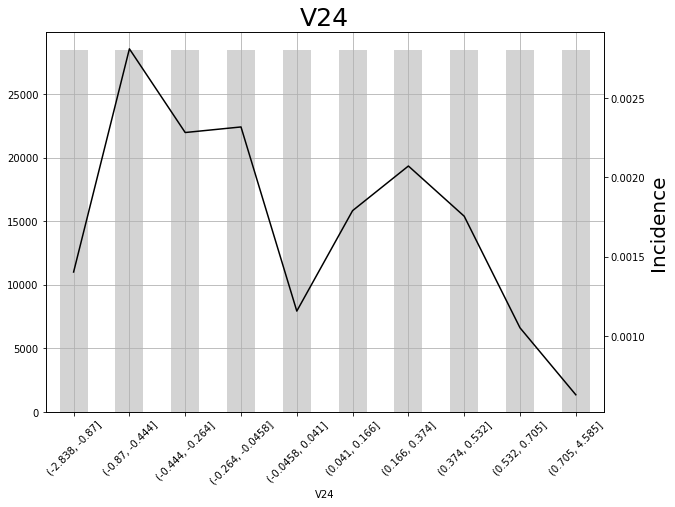

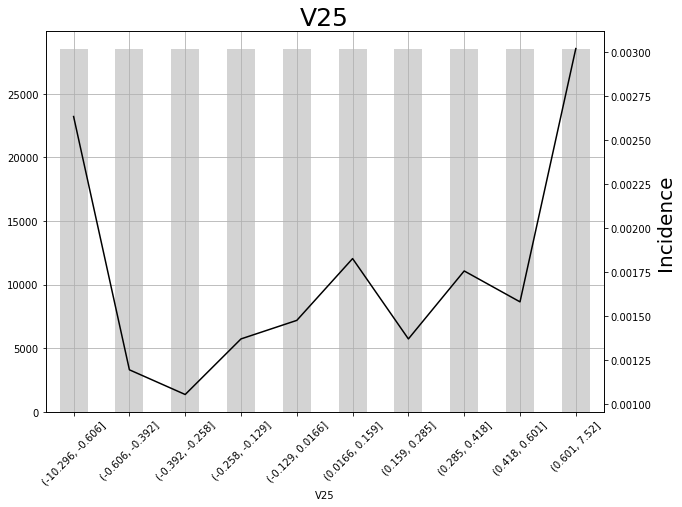

In [33]:
for col in IV_series[IV_series>=0.1].sort_values(ascending=False).index :
    graph_woe(woe_dict, col)

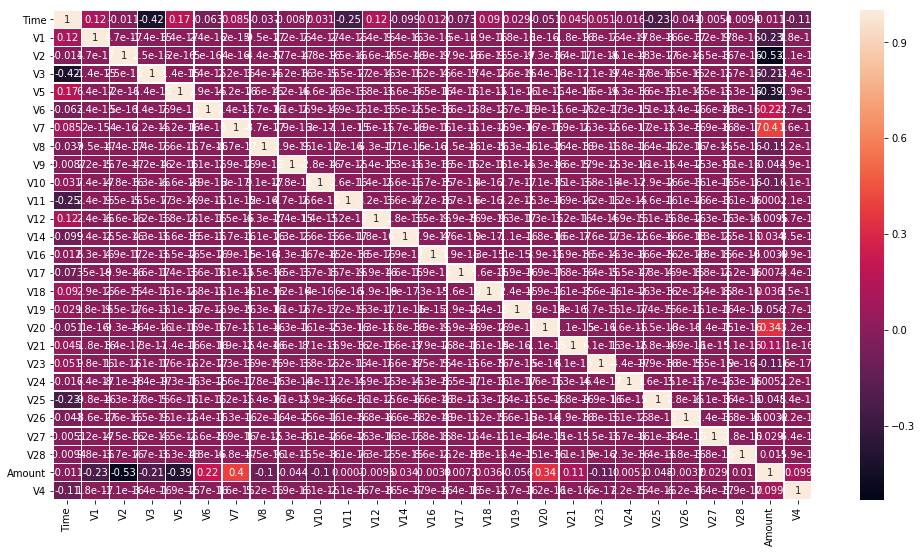

In [34]:
plt.figure(figsize=(17,  9))
top_IV = IV_series[IV_series>=0.1].index
sns.heatmap(train[top_IV].corr(), annot=True, linewidth=0.5)
plt.show()

In [45]:
woe_dict['V9']['woe_V9']

V9
(-13.434999999999999, -1.294]   -1.903875
(-1.294, -0.809]                 0.258712
(-0.809, -0.502]                 0.529283
(-0.502, -0.258]                 1.006629
(-0.258, -0.0514]                0.952527
(-0.0514, 0.176]                 1.258049
(0.176, 0.446]                   1.594697
(0.446, 0.792]                   1.412270
(0.792, 1.302]                   1.006629
(1.302, 15.595]                  1.951477
Name: woe_V9, dtype: float64

In [44]:
train2.join(woe_dict['V9']['woe_V9'], on='V9')

,Class,Time,V1,V2,V3,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,V4,woe_V9
0,0,"(-0.001, 35027.0]","(-1.893, -1.135]","(-0.154, 0.0655]","(1.676, 9.383]","(-0.544, -0.29]","(0.223, 0.629]","(0.214, 0.446]","(0.0224, 0.12]","(0.176, 0.446]",...,"(0.201, 0.413]","(-0.126, -0.0651]","(0.041, 0.166]","(0.0166, 0.159]","(-0.274, -0.166]","(0.0632, 0.135]","(-0.0403, -0.012]","(100.0, 203.0]","(1.139, 16.875]",1.594697
1,0,"(-0.001, 35027.0]","(1.035, 1.225]","(0.0655, 0.303]","(-0.199, 0.18]","(-0.0543, 0.187]","(-0.274, -0.0482]","(-0.159, 0.0401]","(0.0224, 0.12]","(-0.258, -0.0514]",...,"(-0.642, -0.434]","(0.0448, 0.109]","(-0.444, -0.264]","(0.159, 0.285]","(0.0861, 0.175]","(-0.0244, 0.00134]","(0.0112, 0.0269]","(1.0, 3.57]","(-0.0198, 0.462]",0.952527
2,0,"(-0.001, 35027.0]","(-1.893, -1.135]","(-1.36, -0.791]","(1.676, 9.383]","(-0.544, -0.29]","(1.509, 73.302]","(0.698, 1.039]","(0.243, 0.436]","(-13.434999999999999, -1.294]",...,"(0.649, 0.915]","(0.339, 22.528]","(-0.87, -0.444]","(-0.392, -0.258]","(-0.166, -0.0521]","(-0.0911, -0.0542]","(-0.0654, -0.0403]","(203.0, 25691.16]","(-0.0198, 0.462]",-1.903875
3,0,"(-0.001, 35027.0]","(-1.135, -0.747]","(-0.436, -0.154]","(1.676, 9.383]","(-0.0543, 0.187]","(0.629, 1.509]","(0.214, 0.446]","(0.243, 0.436]","(-13.434999999999999, -1.294]",...,"(-0.202, 0.00678]","(-0.204, -0.126]","(-2.838, -0.87]","(0.601, 7.52]","(-0.274, -0.166]","(0.0292, 0.0632]","(0.0535, 0.101]","(100.0, 203.0]","(-1.258, -0.602]",-1.903875
4,0,"(-0.001, 35027.0]","(-1.893, -1.135]","(0.637, 0.957]","(1.216, 1.676]","(-0.544, -0.29]","(-0.0482, 0.223]","(0.446, 0.698]","(-0.459, -0.266]","(0.792, 1.302]",...,"(0.649, 0.915]","(-0.204, -0.126]","(0.041, 0.166]","(-0.258, -0.129]","(0.36, 0.689]","(0.135, 0.265]","(0.18, 33.848]","(59.8, 100.0]","(-0.0198, 0.462]",1.006629
5,0,"(-0.001, 35027.0]","(-0.427, 0.0181]","(0.957, 1.327]","(0.844, 1.216]","(0.187, 0.457]","(-0.0482, 0.223]","(0.446, 0.698]","(0.243, 0.436]","(-0.809, -0.502]",...,"(-0.642, -0.434]","(-0.0651, -0.0112]","(-0.444, -0.264]","(-0.258, -0.129]","(0.0861, 0.175]","(0.135, 0.265]","(0.0535, 0.101]","(3.57, 8.91]","(-0.602, -0.0198]",0.529283
6,0,"(-0.001, 35027.0]","(1.225, 1.695]","(0.0655, 0.303]","(-0.199, 0.18]","(0.187, 0.457]","(0.223, 0.629]","(-0.159, 0.0401]","(0.0224, 0.12]","(0.446, 0.792]",...,"(-0.434, -0.202]","(-0.204, -0.126]","(-0.87, -0.444]","(0.601, 7.52]","(-0.274, -0.166]","(0.0292, 0.0632]","(-0.012, 0.0112]","(3.57, 8.91]","(1.139, 16.875]",1.412270
7,0,"(-0.001, 35027.0]","(-0.747, -0.427]","(1.327, 22.058]","(0.844, 1.216]","(0.802, 1.408]","(0.223, 0.629]","(1.039, 120.589]","(-73.218, -0.459]","(0.446, 0.792]",...,"(-10.934, -0.867]","(0.0448, 0.109]","(-0.87, -0.444]","(-0.606, -0.392]","(-0.0521, 0.0861]","(-22.567, -0.211]","(-15.431, -0.156]","(37.0, 59.8]","(-0.602, -0.0198]",1.412270
8,0,"(-0.001, 35027.0]","(-1.135, -0.747]","(0.0655, 0.303]","(-0.199, 0.18]","(1.408, 34.802]","(1.509, 73.302]","(0.214, 0.446]","(0.769, 20.007]","(-0.502, -0.258]",...,"(-0.434, -0.202]","(-0.329, -0.204]","(0.705, 4.585]","(0.285, 0.418]","(-0.39, -0.274]","(0.00134, 0.0292]","(0.101, 0.18]","(59.8, 100.0]","(-0.602, -0.0198]",1.006629
9,0,"(-0.001, 35027.0]","(-0.427, 0.0181]","(0.957, 1.327]","(0.844, 1.216]","(0.457, 0.802]","(-0.274, -0.0482]","(0.446, 0.698]","(0.0224, 0.12]","(-0.809, -0.502]",...,"(-0.642, -0.434]","(-0.126, -0.0651]","(-0.444, -0.264]","(-0.129, 0.0166]","(0.0861, 0.175]","(0.135, 0.265]","(0.0535, 0.101]","(3.57, 8.91]","(-0.602, -0.0198]",0.529283


In [52]:
for col in top_IV :
    train2 = train2.join(woe_dict[col]['woe_{}'.format(col)], on=col)

In [56]:
train3 = train2.iloc[:, -27:]
train2.drop(train3.columns, axis=1, inplace=True)

Kita mempunyai 2 data training yg akan di jadikan eksperimen, yaitu train, dan train3
Distribusi data dari train3 adalah uniform dan tidak mempunyai outlier
Binning denga weight of evidence kita telah melakukan data cleaning dan feature engeenering, diantaranya menghilangkan outlier, 
Feature selection dengan dasar nilai Information Value, dan transformasi nilai numeric. Jenis feature engeenering yang belum
kita lakukan ada feature creation seperti interaction feature, we will try do it later

In [71]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import roc_auc_score, confusion_matrix

In [92]:
def modeling(model, x, y, params, transform_x=False):
    if transform_x :
        scaler = RobustScaler().fit(x)
        x = scaler.transform(x)
    x_train, x_test, y_train,  y_test = train_test_split(x, y, test_size=0.3, stratify=y)
    
    model_ = model
    params_ = params
    model_grid = GridSearchCV(model_, params, cv=7, scoring='roc_auc', n_jobs=-1)
    model_grid.fit(x_train, y_train)
    print("Best Score {} ".format(model_grid.best_score_))
    print("Best Params {}".format(model_grid.best_params_))
    pred = model_grid.predict(x_test)
    print("Validation score ROC AUC : {}".format(roc_auc_score(y_test, pred)))
    print(confusion_matrix(y_test, pred))

In [93]:
lr_params = {'C':np.arange(0.05, 1, 0.3), 'class_weight':[{0:x, 1:1-x} for x in np.linspace(0.05, 0.2, 7)], 'n_jobs':[-1]}
lr = LogisticRegression()

In [94]:
y = train['Class']
x1 = train.drop('Class', axis=1)

modeling(lr, x1, y, params=lr_params, transform_x=True)

C:\Users\Data Scientist\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


Best Score 0.9795524251191825 
Best Params {'C': 0.35, 'class_weight': {0: 0.05, 1: 0.95}, 'n_jobs': -1}
Validation score ROC AUC : 0.9051005809725547
[[85243    52]
 [   28   120]]


In [98]:
modeling(lr, train3, y, params=lr_params)

C:\Users\Data Scientist\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


Best Score 0.9854966577950782 
Best Params {'C': 0.95, 'class_weight': {0: 0.05, 1: 0.95}, 'n_jobs': -1}
Validation score ROC AUC : 0.9149660637247835
[[85197    98]
 [   25   123]]


setelah dilakukan pengolahan data maka nilai roc auc kita lebih baik di bandingkan raw data, peningkatannya adalah 0.00986548275222876